# Visualização de dados

Interpretar dados é algo bastante importante na área de estatística, os gráficos auxiliam na visualização pois são mais intuitivos. Existem várias formas de representar os diferentes tipos de variáveis por meio de gráficos.

## Gráfico de barras

O eixo x do gráfico de barras representa a variável [qualitativa nominal](#nominal) e o eixo y representa o valor [quantitativo discreto](#discreta). A seguir um exemplo do tempo de falha em minutos por equipamento de uma determinada fábrica.

In [4]:
# Importando bibliotecas
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

### Aqui você pode configurar o seu gráfico de **barras**

In [5]:
# Criação das variáveis
vars = {
    'Dispositivo dimensional lateral': 11,
    'Open gate - bilancela': 42,
    'Painel de solda': 14,
    'Pinça automática': 49,
    'Robô' : 3,
    'Transportador roletes': 46
}

# Configuração do gráfico

    # Tamanho das barras do gráfico
bar_size = 0.8
    # Tamanho do gráfico
graph_size_bar = (20, 7)
    # Título do eixo x e y
x_tittle_bar = "Equipamento"
y_tittle_bar = "Tempo de defeito (minutos)"


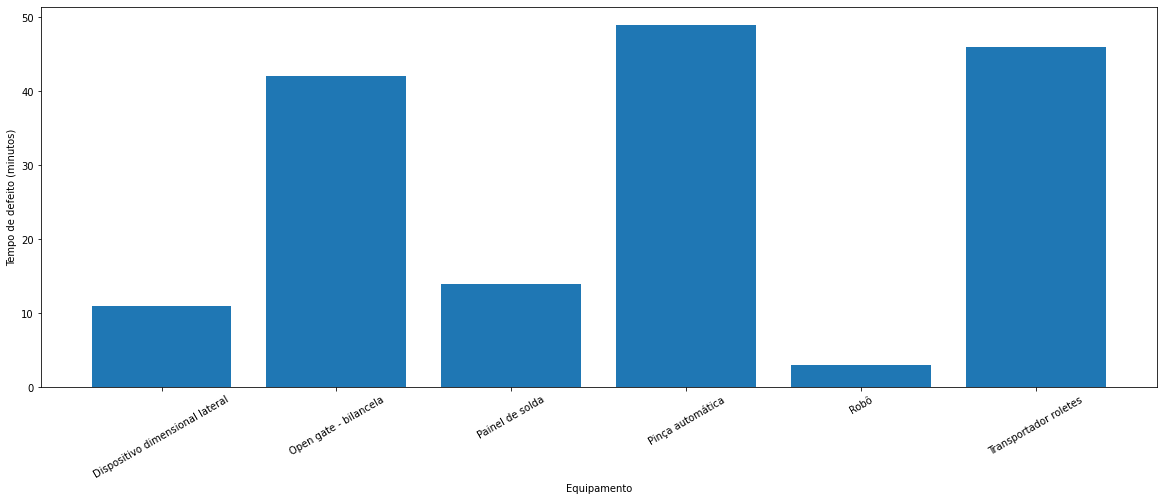

In [6]:
# GERANDO O GRÁFICO

# Coleta de variável qualitativa nominal e discreta
qualitativa = list(vars.keys())
discreta = list(vars.values())

# Aplicando tamanho do gráfico
plt.figure(figsize = graph_size_bar)
 
# Criação do gráfico de barras
plt.bar(
    qualitativa,
    discreta,
    width = bar_size
)

# Configuração das legendas
plt.xticks(rotation=30)
plt.xlabel(x_tittle_bar)
plt.ylabel(y_tittle_bar)

# Mostra o gráfico
plt.show()

## Gráfico de pizza

Cada porção do gráfico de pizza representa a **frequência relativa** em percentagem somando um total de 100% das ocorrências por variável [qualitativa nominal](#nominal), nesse caso o tempo de defeito em minutos.

*frequência relativa : número de ocorrência de cada item*

### Aqui você pode configurar o seu gráfico de **pizza**

In [7]:
# Configuração do gráfico

    # Criar destaque em uma variável
explode = (0.3, 0.2, 0.1, 0, 0, 0.05)
    # Tamanho do gráfico
graph_size_pie = (15, 7)

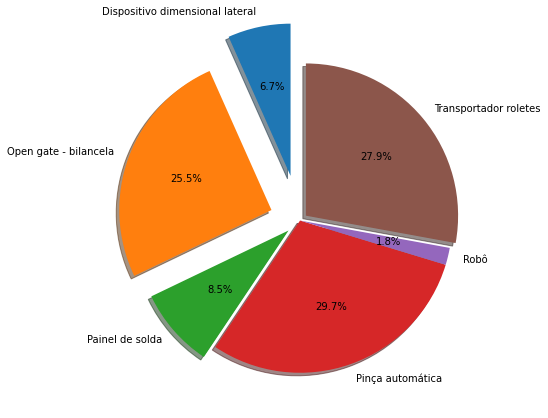

In [8]:
# GERANDO O GRÁFICO

# Extraindo frequência relativa dos defeitos
freq_rel = list(map(lambda x: x / sum(discreta), discreta))

# Definindo o tamanho do gráfico
plt.figure(figsize = graph_size_pie)

# Criando o gráfico de pizza
plt.pie(
        freq_rel,
        explode = explode,
        labels = qualitativa,
        autopct='%1.1f%%',
        shadow=True,
        startangle=90
)

plt.show()

## Diagrama de pareto

O diagrama de Pareto é um tipo especial de gráfico de barra no qual a variável [qualitativa nominal](#qualitativa) é apresentada de forma descendente pela **frequência relativa** e a **frequência acumulada** que está representada em uma curva. A seguir o diagrama de pareto para os defeitos 

*frequência acumulada : soma consecutiva da frequência relativa*

### Aqui você pode configurar o seu gráfico de **pareto**

In [9]:
    # Tamanho do gráfico
graph_size_pareto = (18.5, 10.5)

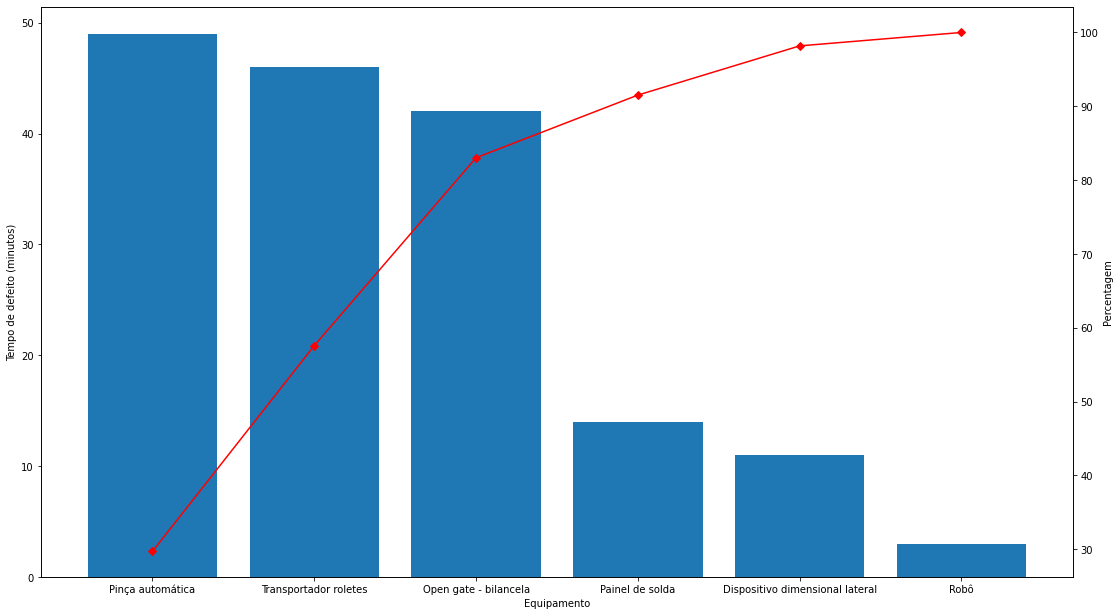

In [10]:
# Criando dataset para facilitar o ordenação dos elementos
df = pd.DataFrame(
    {
        y_tittle_bar : discreta
    }
)

# Definindo index
df.index = qualitativa

# Ordenando valores de forma descendente
df = df.sort_values(by = y_tittle_bar, ascending = False)

# Acumulando a percentagem relativa
df['cumperc'] = df[y_tittle_bar].cumsum()/df[y_tittle_bar].sum() * 100

# Criando figura e gráfico
fig, ax = plt.subplots()

# Criação do gráfico de barras
ax.bar(df.index, df[y_tittle_bar])

# Definindo segundo
ax2 = ax.twinx()

# Criando linha
ax2.plot(df.index, df['cumperc'], marker = "D", color = "red")


# Definindo tamanho do gráfico

# Rotacionando o eixo x
#fig.xticks(rotation=90)
ax.set_xlabel(x_tittle_bar)
ax.set_ylabel(y_tittle_bar)
ax2.set_ylabel("Percentagem")

fig.set_size_inches(graph_size_pareto)
plt.show()

## Histograma

O Histograma é um gráfico utilizado para representar variáveis [quantitativas](#quantitativa), o eixo x representa os intervalos em que os dados estão e o eixo y representa a frequência dos dados no intervalo determinado. Os histogramas resumem uma grande quantidade de dados e podem ser utilizados como indicador de variabilidade.

### Aqui você pode configurar o seu **histograma**

In [59]:
# Configuração do gráfico
    # Criação da variável
vars2 = {
    1, 15, 12, 22, 56, 78, 90, 56, 76, 90, 45, 12, 30, 40, 3, 9, 7
}
    # Quantidade de barras
bins = 10

    # Tamanho do gráfico
graph_size_hist = (15, 7)


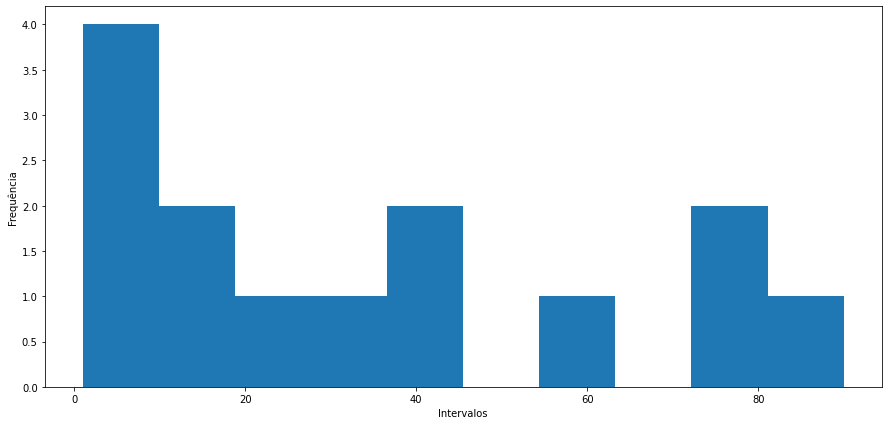

In [60]:
# GERANDO O GRÁFICO
    # Tamano do gráfico
plt.figure(figsize = graph_size_hist)

plt.hist(
    vars2,
    bins = bins,
)

# Configuração das legendas
plt.xlabel("Intervalos")
plt.ylabel("Frequência")

# Mostra o gráfico
plt.show()

### Histograma com variáveis aleatórios

Criação de um histograma com variáveis aletórias distribuidas normalmente

In [77]:
# Configuração do gráfico
    # Quantidade de dados
size = 1000
    # Quantidade de barras
bins_random = 30
    # Tamanho do gráfico
graph_size_hist_random = (25, 10)


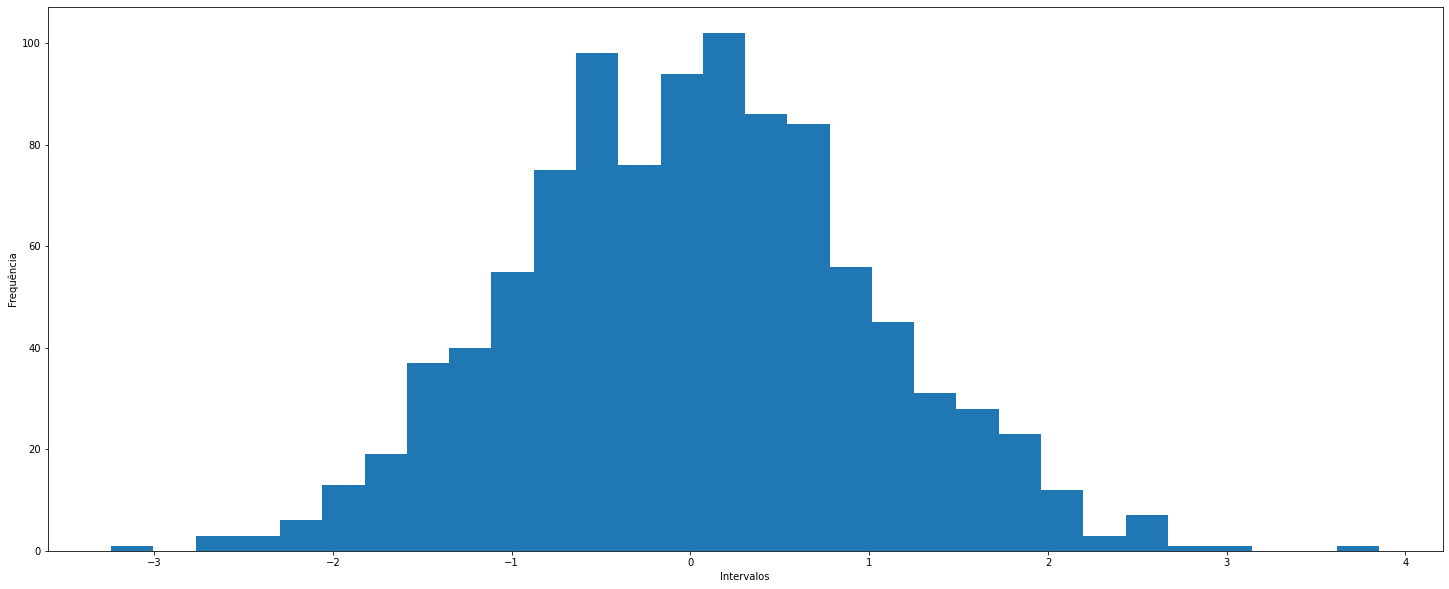

In [78]:
# GERANDO O GRÁFICO
    # Configuração de aleatoriedade
np.random.seed(42)
    # Criaçao dos dados
x = np.random.normal(size = size)
    # Tamanho do gráfico
plt.figure(figsize = graph_size_hist_random)

plt.hist(x, bins = bins_random)
plt.ylabel('Frequência')
plt.xlabel('Intervalos')
plt.show()

## Boxplot

O boxplot é uma ferramenta utilizada para representar variação de dados por meio de quartis

In [21]:
# Carregando dados
contas_data = sns.load_dataset('tips')
# Visualizando a base de dados
contas_data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


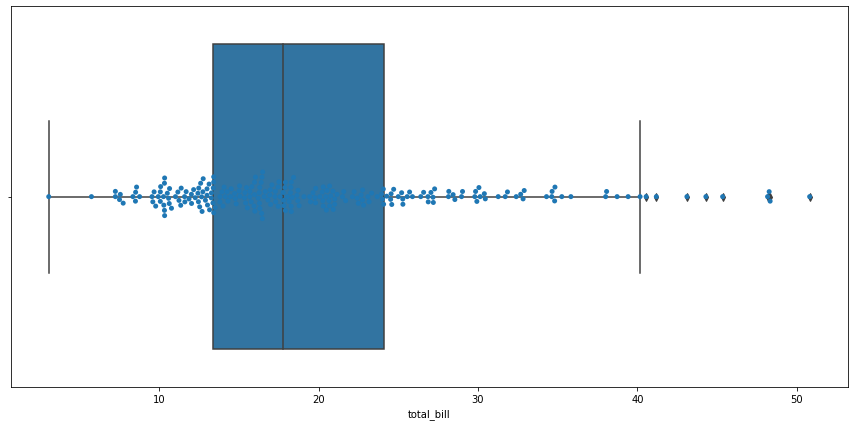

In [29]:
# Agrupando os dados por espécie
plt.figure(figsize = (15, 7))
ax = sns.boxplot(x = contas_data["total_bill"])
ax = sns.swarmplot(x = contas_data["total_bill"])


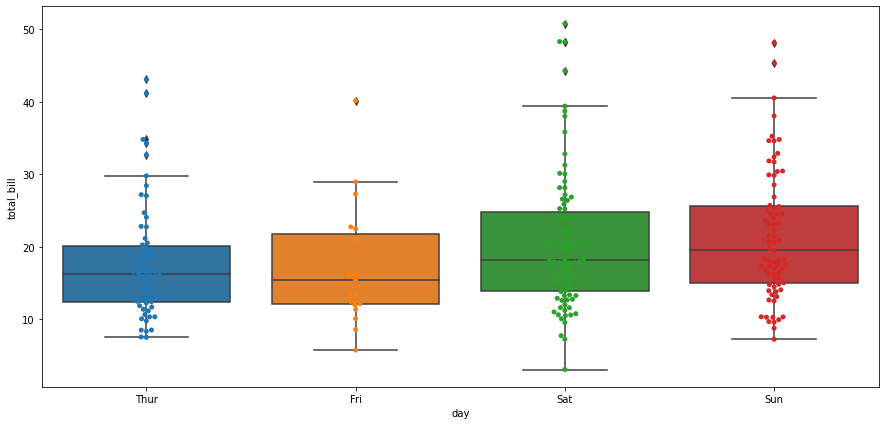

In [39]:
plt.figure(figsize = (15, 7))
ax = sns.boxplot(x="day", y="total_bill", data = contas_data)
ax = sns.swarmplot(x="day", y="total_bill", data = contas_data)